In [1]:
import numpy as np
from dgamod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import os
mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

In [2]:
path = '/home/sofi/Documentos/resultados_dynga/'

In [3]:
def compare_mean(dataframes, title = False, attribute = 'fitness', labels = False, figsize = [12,5], save = False):
    
    axs = plt.figure(figsize=figsize)

    if not title:
        title = 'Mean ' + attribute
    
    for i in range(len(dataframes)):
        dataframe = dataframes[i]
        
        if labels:
            label = labels[i]

        grouped_df = dataframe.groupby('dimension')
        mean = grouped_df[attribute].mean()
        std = grouped_df[attribute].std()
        min_value = grouped_df[attribute].min()
        max_value = grouped_df[attribute].max()

        stats = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                            'max': max_value})

        stats = stats.reset_index()

        plt.errorbar(stats['dimension'],stats['mean'], yerr=stats['std'],fmt='o-',label = label,capsize=4, zorder=-2)
    plt.grid(True)
    plt.legend()
    plt.xlabel('N')
    plt.ylabel(attribute)
    plt.title(title)

    if save:
        plt.savefig(save + 'mean' +attribute + '.png')
    return True

def compare_maxmin(dataframes, maxmin = 'max',title = False, attribute = 'fitness', labels = False, figsize = [12,5], save = False):
    
    axs = plt.figure(figsize=figsize)

    if not title:
        title = 'Mean' + attribute
    
    for i in range(len(dataframes)):
        dataframe = dataframes[i]
        
        if labels:
            label = labels[i]

        grouped_df = dataframe.groupby('dimension')
        mean = grouped_df[attribute].mean()
        std = grouped_df[attribute].std()
        min_value = grouped_df[attribute].min()
        max_value = grouped_df[attribute].max()

        stats = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                            'max': max_value})

        stats = stats.reset_index()
        if maxmin == 'max':
            plt.plot(stats['dimension'],stats['max'], 'o-',label = label)
        if maxmin == 'min':
            plt.plot(stats['dimension'],stats['min'], 'o-',label = label)

    plt.grid(True)
    plt.legend()
    plt.xlabel('N')
    plt.ylabel(attribute)
    plt.title(title)

    if save:
        plt.savefig(save + maxmin +attribute + '.png')

    return True

In [4]:
# -------------------------------------------------
# separated instances version dataframe
# -------------------------------------------------

n_values = np.arange(6,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
si_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + '/n{}_si/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    si_df = pd.concat([si_df,df])

separated_instances = si_df
separated_instances['time'] = separated_instances['time']*0.15



# -------------------------------------------------
# original version dataframe
# -------------------------------------------------

n_values = np.arange(6,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
og_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + '/n{}_og/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    og_df = pd.concat([og_df,df])

original_version = og_df 

# -------------------------------------------------
# original version + high tolerance dataframe
# -------------------------------------------------

n_values = np.arange(6,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
ht_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + '/n{}_og_ht/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    ht_df = pd.concat([ht_df,df])

high_tolerance = ht_df 


# -------------------------------------------------
# new actions dataframe
# -------------------------------------------------

n_values = np.arange(6,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
na1_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + 'n{}_na_1i/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    na1_df = pd.concat([na1_df,df])

new_actions1_version = na1_df 

# -------------------------------------------------
# new actions dataframe
# -------------------------------------------------

n_values = np.arange(6,14)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
na_si_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + 'n{}_na_si/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    na_si_df = pd.concat([na_si_df,df])
na_si_df['time'] = na_si_df['time']*0.15
new_actions_si = na_si_df 


/tmp/ipykernel_12396/2212499826.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  si_df = pd.concat([si_df,df])
/tmp/ipykernel_12396/2212499826.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  og_df = pd.concat([og_df,df])
/tmp/ipykernel_12396/2212499826.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behav

True

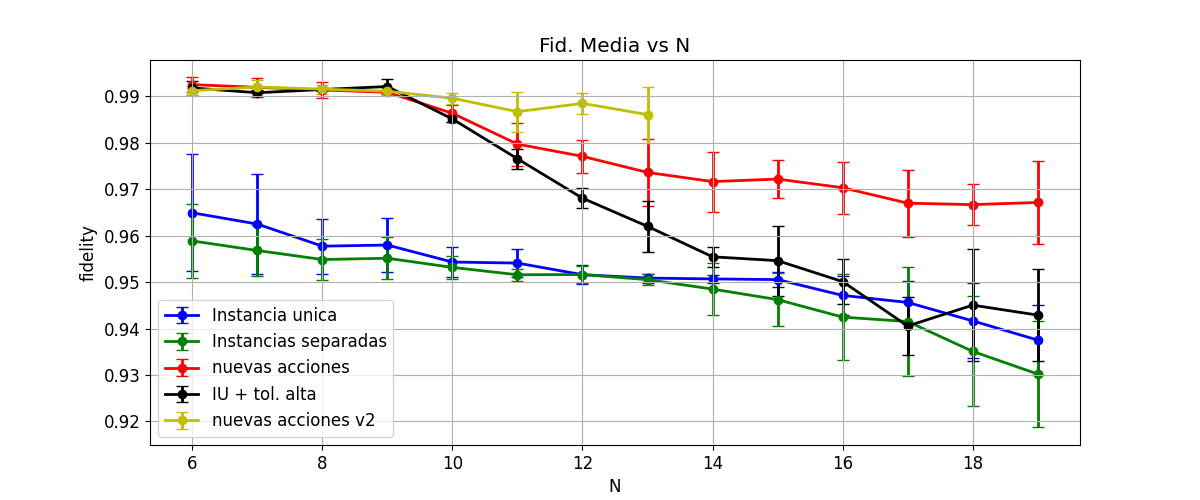

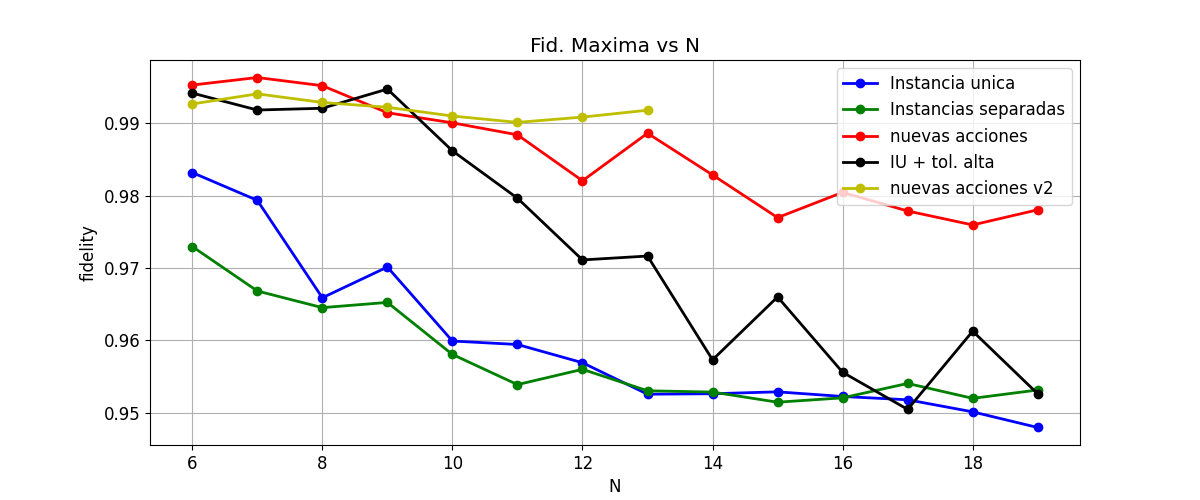

In [5]:

compare_mean([original_version,separated_instances, new_actions1_version,high_tolerance,na_si_df],title= 'Fid. Media vs N', attribute= 'fidelity',labels=['Instancia unica','Instancias separadas', 'nuevas acciones', 'IU + tol. alta', 'nuevas acciones v2'])
compare_maxmin([original_version,separated_instances,new_actions1_version, high_tolerance,na_si_df],title= 'Fid. Maxima vs N', attribute= 'fidelity',labels=['Instancia unica','Instancias separadas', 'nuevas acciones', 'IU + tol. alta', 'nuevas acciones v2'])


#plt.plot(data['dimension'],3*data['dimension'])

True

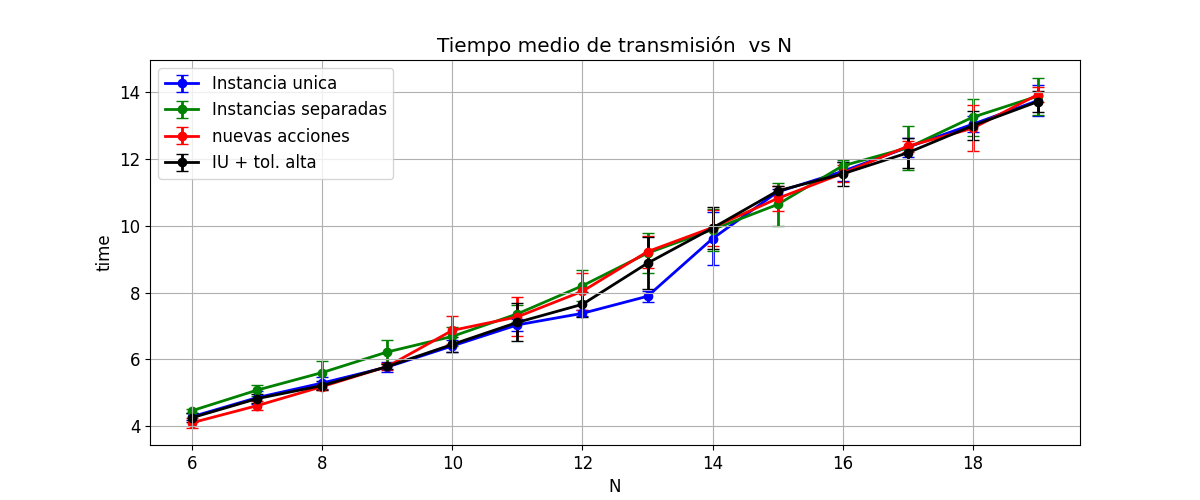

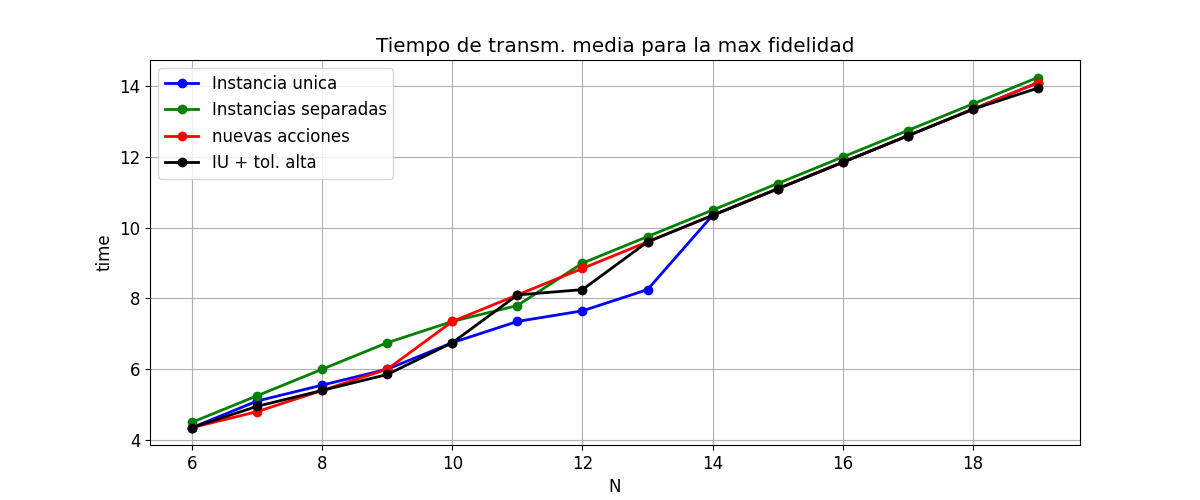

In [6]:

compare_mean([original_version,separated_instances, new_actions1_version,high_tolerance],title= 'Tiempo medio de transmisión  vs N', attribute= 'time',labels=['Instancia unica','Instancias separadas', 'nuevas acciones', 'IU + tol. alta', 'nuevas acciones v2'])
compare_maxmin([original_version,separated_instances, new_actions1_version,high_tolerance],title= 'Tiempo de transm. media para la max fidelidad', attribute= 'time',labels=['Instancia unica','Instancias separadas', 'nuevas acciones', 'IU + tol. alta', 'nuevas acciones v2'])

#plt.plot(data['dimension'],3*data['dimension'])

True

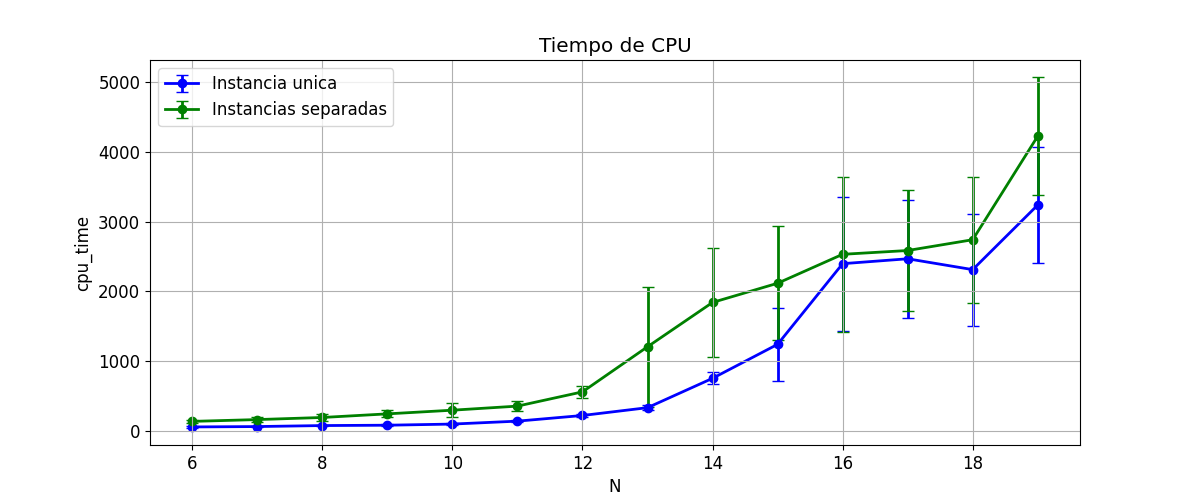

In [7]:

compare_mean([original_version,separated_instances],title= 'Tiempo de CPU', attribute= 'cpu_time',labels=['Instancia unica','Instancias separadas'])
#plt.plot(data['dimension'],3*data['dimension'])

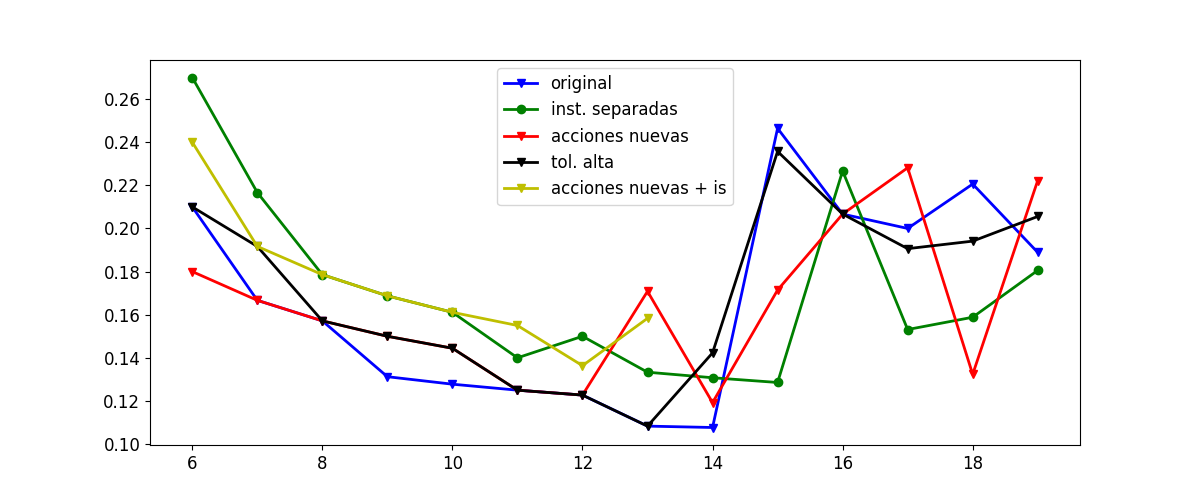

In [8]:
axs = plt.figure(figsize=[12,5])



grouped_si = separated_instances.groupby('dimension')
mean = grouped_si['time'].mean()
std = grouped_si['time'].std()
min_value = grouped_si['time'].min()
max_value = grouped_si['time'].max()

stats_si = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                    'max': max_value})

grouped_df = original_version.groupby('dimension')
mean = grouped_df['time'].mean()
std = grouped_df['time'].std()
min_value = grouped_df['time'].min()
max_value = grouped_df['time'].max()

stats_og = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                    'max': max_value})


dims = np.arange(6,20)
normalized_si_time = (stats_si['min']-dims/2)/(dims-1)
normalized_og_time = (stats_og['min']-dims/2)/(dims-1)


plt.plot(dims, normalized_og_time,'-v', label = 'original')
plt.plot(dims, normalized_si_time, '-o', label = 'inst. separadas')


grouped_df = new_actions1_version.groupby('dimension')
mean = grouped_df['time'].mean()
std = grouped_df['time'].std()
min_value = grouped_df['time'].min()
max_value = grouped_df['time'].max()

stats_na1 = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                    'max': max_value})

dims = np.arange(6,20)
normalized_na1_time = (stats_na1['min']-dims/2)/(dims-1)

plt.plot(dims, normalized_na1_time,'-v', label = 'acciones nuevas')


grouped_df = high_tolerance.groupby('dimension')
mean = grouped_df['time'].mean()
std = grouped_df['time'].std()
min_value = grouped_df['time'].min()
max_value = grouped_df['time'].max()

stats_ht = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                    'max': max_value})

dims = np.arange(6,20)
normalized_ht_time = (stats_ht['min']-dims/2)/(dims-1)

plt.plot(dims, normalized_ht_time,'-v', label = 'tol. alta')

plt.legend()

grouped_df = na_si_df.groupby('dimension')
mean = grouped_df['time'].mean()
std = grouped_df['time'].std()
min_value = grouped_df['time'].min()
max_value = grouped_df['time'].max()

stats_na_si = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                    'max': max_value})

dims = np.arange(6,14)
normalized_na_si = (stats_na_si['min']-dims/2)/(dims-1)

plt.plot(dims, normalized_na_si,'-v', label = 'acciones nuevas + is')

plt.legend()